In [241]:
import csv
import matplotlib
import matplotlib.pyplot as plt

In [242]:
response_csv_path = "./response_time.csv"
result_csv_path = "./results.csv"

In [243]:
def convert_cpu_util_to_dict(name, index, file_path):
    data = []
    with open(file_path) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        csv_reader = list(csv_reader)
        for idx, row in enumerate(csv_reader):
            if idx == 0:
                pass #skip the first and last row
            else:
                data.append({'workers':row[0], name: row[index]})
    return data

def convert_memory_util_to_dict(name, index, file_path):
    data = []
    with open(file_path) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        csv_reader = list(csv_reader)
        for idx, row in enumerate(csv_reader):
            if idx == 0:
                pass #skip the first and last row
            else:
                data.append({'workers':row[0], name: row[index]})
    return data

def convert_resp_to_dict(file_path):
    data = []
    with open(file_path) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        csv_reader = list(csv_reader)
        for idx, row in enumerate(csv_reader):
            if idx == 0:
                pass #skip the first and last row
            else:
                data.append({'workers':row[0], 'response_time': row[1]})
    return data

def convert_resp_95_to_dict(file_path):
    data = []
    with open(file_path) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        csv_reader = list(csv_reader)
        for idx, row in enumerate(csv_reader):
            if idx == 0:
                pass #skip the first and last row
            else:
                data.append({'workers':row[0], 'p95_response_time': row[2]})
    return data

def convert_rate_to_dict(file_path):
    data = []
    with open(file_path) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        csv_reader = list(csv_reader)
        for idx, row in enumerate(csv_reader):
            if idx == 0:
                pass #skip the first and last row
            else:
                data.append({'workers':row[0], 'requests': row[3]})
    return data

# CPU Utilization graphs

In [244]:
service_endpoint_cpu_values = convert_cpu_util_to_dict('service_cpu_utils', 1, result_csv_path)
auth_endpoint_cpu_values = convert_cpu_util_to_dict('auth_endpoint_cpu', 9, result_csv_path)
policy_eval_cpu_endpoint_values = convert_cpu_util_to_dict('policy_eval_cpu_util', 3, result_csv_path)
policy_engine_cpu_endpoint_values = convert_cpu_util_to_dict('policy_engine_cpu_util', 5, result_csv_path)
trust_compute_cpu_endpoint_values = convert_cpu_util_to_dict('trust_cpu_util', 7, result_csv_path)
service_knowledge_cpu_endpoint_values = convert_cpu_util_to_dict('service_knowledge_cpu_util', 11, result_csv_path)
observed_knowledge_cpu_util = convert_cpu_util_to_dict('observed_knowledge_cpu_util', 13, result_csv_path)


In [245]:
workers = [int(x['workers']) for x in service_endpoint_cpu_values]
service_endpoint_utlis = [(float(x['service_cpu_utils']))/4 for x in service_endpoint_cpu_values]
auth_endpoint_utlis = [(float(x['auth_endpoint_cpu']))/4 for x in auth_endpoint_cpu_values]
policy_eval_cpu_utlis = [(float(x['policy_eval_cpu_util']))/4 for x in policy_eval_cpu_endpoint_values]
policy_engine_cpu_utlis = [(float(x['policy_engine_cpu_util']))/4 for x in policy_engine_cpu_endpoint_values]
trust_compute_cpu_utlis = [(float(x['trust_cpu_util']))/4 for x in trust_compute_cpu_endpoint_values]
service_knowledge_cpu_utlis = [(float(x['service_knowledge_cpu_util']))/4 for x in service_knowledge_cpu_endpoint_values]
observed_knowledge_cpu_utlis = [(float(x['observed_knowledge_cpu_util']))/4 for x in observed_knowledge_cpu_util]
total_cpu = [a+b+c+d+e+f+g for a,b,c,d,e,f,g in zip(service_endpoint_utlis, auth_endpoint_utlis, policy_eval_cpu_utlis, policy_engine_cpu_utlis, trust_compute_cpu_utlis, service_knowledge_cpu_utlis, observed_knowledge_cpu_utlis)]

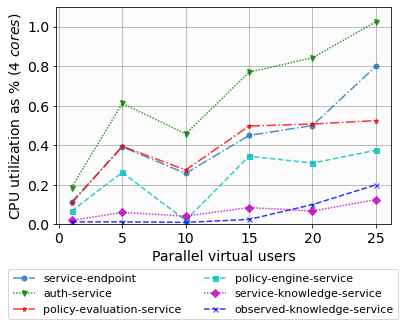

In [246]:
plt.rc('font', size=14)  
fig, axs = plt.subplots()
axs.set_ylim([0, 1.1])
axs.set_facecolor('#fcfcfc')

axs.set_xlabel('Parallel virtual users')

axs.set_ylabel('CPU utilization as % $\it{(4~cores)}$')
#axs.plot(workers, total_cpu, 'r', label='Total CPU usage', marker='d', markersize=7)
axs.plot(workers, service_endpoint_utlis, linestyle='dashdot',label='service-endpoint', marker='o', markersize=5, alpha=0.8)
axs.plot(workers, auth_endpoint_utlis, 'g' ,linestyle=(0, (1,1)), label='auth-service', marker='v', markersize=5, alpha=0.8)
axs.plot(workers, policy_eval_cpu_utlis, 'r' ,linestyle='dashdot', label='policy-evaluation-service', marker='*', markersize=5, alpha=0.8)
axs.plot(workers, policy_engine_cpu_utlis, 'c--' ,label='policy-engine-service', marker='s',  markersize=5, alpha=0.8)
#axs.plot(workers, trust_compute_cpu_utlis, 'g--' ,label='auth-service', marker='x', mec='k', markersize=4, alpha=0.8)
axs.plot(workers, service_knowledge_cpu_utlis, 'm' ,linestyle=(0, (1,1)), label='service-knowledge-service', marker='D',markersize=5, alpha=0.8)
axs.plot(workers, observed_knowledge_cpu_utlis, 'b--' ,label='observed-knowledge-service', marker='x', markersize=5, alpha=0.8)

axs.legend(fontsize=11,loc=2, ncol=2, bbox_to_anchor=(-0.16, -0.18),)
axs.grid(axis='both', color='#7D7D7D', linestyle='-', linewidth=0.5)
plt.savefig("cpu_util_by_service.pdf", bbox_inches='tight')
plt.show()


### Showing trust compute service and total as a seperate graph

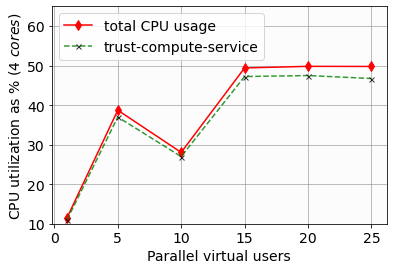

In [247]:
fig, axs = plt.subplots()
axs.set_ylim([10, 65])
axs.set_facecolor('#fcfcfc')

axs.set_xlabel('Parallel virtual users')

axs.set_ylabel('CPU utilization as % $\it{(4~cores)}$')
axs.plot(workers, total_cpu, 'r', label='total CPU usage', marker='d', markersize=7)
axs.plot(workers, trust_compute_cpu_utlis, 'g--' ,label='trust-compute-service', marker='x', mec='k', markersize=5, alpha=0.8)

axs.legend(loc=2)
axs.grid(axis='both', color='#7D7D7D', linestyle='-', linewidth=0.5)
plt.savefig("cpu_util_by_service_total.pdf", bbox_inches='tight')
plt.show()



In [248]:
service_endpoint_resp_values = convert_resp_to_dict(response_csv_path)
service_endpoint_resp_values = [float(x['response_time'])/1000 for x in service_endpoint_resp_values]



service_endpoint_95_resp_values = convert_resp_95_to_dict(response_csv_path)
service_endpoint_95_resp_values = [float(x['p95_response_time'])/1000 for x in service_endpoint_95_resp_values]


service_endpoint_rate = convert_rate_to_dict(response_csv_path)
service_endpoint_rate = [int(x['requests'])/121/int(x['workers']) for x in service_endpoint_rate]


[0.743801652892562, 0.6644628099173554, 0.35371900826446284, 0.2462809917355372, 0.18760330578512396, 0.15140495867768594]


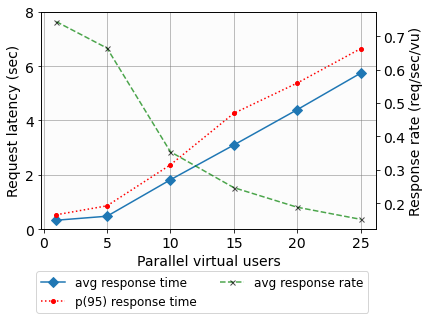

In [249]:
#plt.rc('font', size=20)          # controls default text sizes
fig, axs = plt.subplots()

axs.grid(axis='both', color='#7D7D7D', linestyle='-', linewidth=0.5, zorder=0)
axs.set_ylim([0, 8])
axs.set_xlabel('Parallel virtual users')
axs.set_facecolor('#fcfcfc')
axs.set_ylabel('Request latency (sec)')

#p1 = axs.bar(workers, service_endpoint_resp_values, 3, zorder=3, alpha=0.9)
axs.plot(workers, service_endpoint_resp_values, label='avg response time',  marker='D', markersize=7)

axs.plot(workers, service_endpoint_95_resp_values, 'r', linestyle='dotted',label='p(95) response time', marker='o', markersize=4)

axs2 = axs.twinx()
#axs2.set_ylim([0, 1])
print(service_endpoint_rate)
axs2.plot(workers, service_endpoint_rate, linestyle='dashed', color='g', marker='x', markersize=5, alpha=0.7, mec='k', label='avg response rate')
axs2.set_ylabel('Response rate (req/sec/vu)')
fig.legend(fontsize=12,loc=2, ncol=2, bbox_to_anchor=(0.1, -0),)
plt.savefig("elasticity_token_response_time.pdf", bbox_inches='tight')
plt.show()


In [250]:
service_endpoint_memory_values = convert_memory_util_to_dict('service_memory_util', 2, result_csv_path)
auth_endpoint_memory_values = convert_memory_util_to_dict('auth_endpoint_memory', 10, result_csv_path)
policy_eval_memory_endpoint_values = convert_memory_util_to_dict('policy_eval_memory_util', 4, result_csv_path)
policy_engine_memory_endpoint_values = convert_memory_util_to_dict('policy_engine_memory_util', 6, result_csv_path)
trust_compute_memory_endpoint_values = convert_memory_util_to_dict('trust_memory_util', 8, result_csv_path)
service_knowledge_memory_endpoint_values = convert_memory_util_to_dict('service_knowledge_memory_util', 12, result_csv_path)
observed_knowledge_memory_util = convert_memory_util_to_dict('observed_knowledge_memory_util', 14, result_csv_path)

In [251]:
workers = [int(x['workers']) for x in service_endpoint_cpu_values]
service_endpoint_memory_values = [(float(x['service_memory_util']))/4 for x in service_endpoint_memory_values]
auth_endpoint_memory_values = [(float(x['auth_endpoint_memory']))/4 for x in auth_endpoint_memory_values]
policy_eval_memory_endpoint_values = [(float(x['policy_eval_memory_util']))/4 for x in policy_eval_memory_endpoint_values]
policy_engine_memory_endpoint_values = [(float(x['policy_engine_memory_util']))/4 for x in policy_engine_memory_endpoint_values]
trust_compute_memory_endpoint_values = [(float(x['trust_memory_util']))/4 for x in trust_compute_memory_endpoint_values]
service_knowledge_memory_endpoint_values = [(float(x['service_knowledge_memory_util']))/4 for x in service_knowledge_memory_endpoint_values]
observed_knowledge_memory_util = [(float(x['observed_knowledge_memory_util']))/4 for x in observed_knowledge_memory_util]
total_cpu = [a+b+c+d+e+f+g for a,b,c,d,e,f,g in zip(service_endpoint_memory_values, auth_endpoint_memory_values, policy_eval_memory_endpoint_values, policy_engine_memory_endpoint_values, trust_compute_memory_endpoint_values, service_knowledge_memory_endpoint_values, observed_knowledge_memory_util)]
print(total_cpu)

[96.32499999999999, 100.67500000000001, 101.77499999999998, 108.775, 111.775, 117.025]


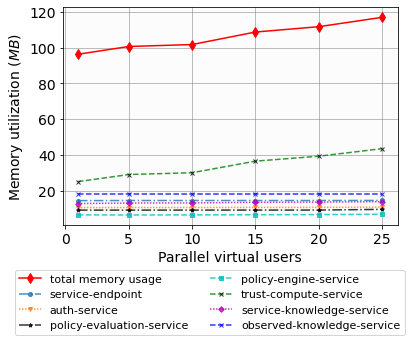

In [252]:
plt.rc('font', size=14)  
fig, axs = plt.subplots()
axs.set_facecolor('#fcfcfc')

axs.set_xlabel('Parallel virtual users')

axs.set_ylabel('Memory utilization $\it{(MB)}$')
axs.plot(workers, total_cpu, 'r', label='total memory usage', marker='d', markersize=7)
axs.plot(workers, service_endpoint_memory_values, linestyle='dashdot',label='service-endpoint', marker='o', markersize=4, alpha=0.8)
axs.plot(workers, auth_endpoint_memory_values, 'tab:orange' ,linestyle=(0, (1,1)), label='auth-service', marker='v', markersize=4, alpha=0.8)
axs.plot(workers, policy_eval_memory_endpoint_values, 'k' ,linestyle='dashdot', label='policy-evaluation-service', marker='*', markersize=4, alpha=0.8)
axs.plot(workers, policy_engine_memory_endpoint_values, 'c--' ,label='policy-engine-service', marker='s',  markersize=4, alpha=0.8)
axs.plot(workers, trust_compute_memory_endpoint_values, 'g--' ,label='trust-compute-service', marker='x', mec='k', markersize=4, alpha=0.8)
axs.plot(workers, service_knowledge_memory_endpoint_values, 'm' ,linestyle=(0, (1,1)), label='service-knowledge-service', marker='D',markersize=4, alpha=0.8)
axs.plot(workers, observed_knowledge_memory_util, 'b--' ,label='observed-knowledge-service', marker='x', markersize=4, alpha=0.8)

axs.legend(fontsize=11,loc=2, ncol=2, bbox_to_anchor=(-0.16, -0.18),)
axs.grid(axis='both', color='#7D7D7D', linestyle='-', linewidth=0.5)
plt.savefig("memory_util_by_service.pdf", bbox_inches='tight')
plt.show()
